# Problem Statement :
-------------

The Indian Premier League (IPL) is a professional league for Twenty20 cricket championship in India.
It started in the year 2007-2008 and is running in its ninth year of existence.
The pattern of the league is such that each team plays all other teams twice in the league stage, one in the HOME venue and other in the AWAY venue. 
After the league stage top four teams enter the semi-final stage and the top two teams enter the final contest.


## Objective
---------
The goal of the contest is to develop a model to predict likelihood of a team winning the match. 
The true label of which team (team batting first or second) won the match is provided as “Team Won”. See data dictionary for more explanation.
 

## Dataset
-------
Dataset on all match statistics plus some derived features from season 2008 to 2012 is provided as an attachment supported by a data 
dictionary for the same.
The training dataset contains match statistics from 2008 to 2011 season. And the test dataset contains match statistics from 2012 season. 

-- train data : train.csv <br/>
-- test data  : test.csv<br/>
-- data dictionary : data_dictionary.xlsx

## Expectations
------------

We are looking for prediction of a team (either Team 1 or Team 2) winning the match & probability score for the team winning the game.


## Solution/Approach
#### Steps
1. Reading csv/xlsx etc file and then checking dimension,few rows to know little about data etc and merging the train and test datasets
2. Variable identification to know about <b>continuous or categorical in nature</b>
3. Univariate analysis<br/>
    A. Continuous Variables<br/>
    Tabular and graphical method is used to know about <b>mean,median,mode,missing values,Q1,Q3,skewness,outliers</b> etc
    
    B. Categorical Variables<br/>
    Tabular and graphical method is used to know about number of times each value occuring in that particular column<br/>
    <br/>
4. Bivariate analysis<br/>
    Tabular and graphical method is used to know about relation between continuous-continuous variables using            
    <b>correlation</b>,categorical-continuous variables using bar plot.
5. Outliers Treatment:<br/>
    Using <b>box plot</b>, i am able to find outliers then using <b>Q1-1.5(Q3-Q1)</b> and <b>Q3+1.5(Q3-Q1)</b> , i am replacing     that outliers with median.
6. Variable Transormation:<br/>
    Using LabelEncoder from sckikit learn ,transforming categorical varaibles into numerical form. 
    
7. Modeling:<br/>
   a.Separating indepedent and dependent variable from our data set<br/><br/>
   <b>7.1 Bagging and Boosting Techniques (Accuracy : 86%)</b><br/>
   <b>7.2 Logistic Regression(Accuracy : 93%)</b><br/>
   <b>7.3 Neural Network(Accuracy : 84%)</b><br/>
   
   b.Predicting the value for each of the above techniques and maximum likelihood<br/>
   c.Finally compare the <b>accuracy</b> of each of the model.<br/>
   d.<b>I had included two new columns(my_prediction,likelihood_winning) in test dataset to compare from original values.</b>

# 1. Exploring the dataset :

In [253]:
# importing common use libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [254]:
# importing the dataset

train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
data_dict=pd.read_excel('data_dictionary.xlsx')

data_dict

,Variable Name,Description,Cricketing Jargons
0,Team 1,Team batting first and bowling second,NaN
1,Team 2,Team batting second and bowling first,Bowled\na mode of a batsman's dismissal. Occur...
2,City of match,City where the match is played,Catch\nto dismiss a batsman by a fielder catch...
3,Day,Day of the week when the match is played,Run out\ndismissal by a member of the fielding...
4,Date of Match,Date of the year when the match is played,Leg before wicket (LBW)\na way of dismissing t...
5,Time of Match,Time of the day when the match is played,Stumping: It requires co-operation between a b...
6,Avg Wind Speed,Average speed of the wind on the day when the ...,Strike rate\n percentage equal to the number o...
7,Avg Humidity,Average humidity on the day when the match is ...,Innings\none player's or one team's turn to ba...
8,"Inn 1 Team 1 NOP R>25,SR>125",NoP(Number of players) in Team 1 that scored m...,Spin bowling\na style of bowling in which a sp...
9,"Inn 1 Team 1 NOP R<25, SR>125",NoP(Number of players) in Team 1 that scored l...,NaN


In [255]:
# copying the original dataset

train_original=train.copy()
test_original=test.copy()

In [256]:
# checking dimension

train.shape,test.shape

((252, 30), (76, 30))

In [257]:
# seeing columns in train dataset

train.columns.tolist()

['Game ID',
 'Team 1',
 'Team 2',
 'City',
 'DayOfWeek',
 'DateOfGame',
 'TimeOfGame',
 'AvgWindSpeed',
 'AvgHumidity',
 'Inn 1 Team 1 NOP R>25,SR>125',
 'Inn 1 Team 1 NOP R<25, SR>125',
 'Inn 1 Team 1 Total 4s',
 'Inn 1 Team 1 Total 6s',
 'Inn 1 Team 1 Max Strike Rate_ALLBatsmen',
 'Inn 1 Team 2 NoP fast bowlers',
 'Inn 1 Team 2 NoP Spinners',
 'Inn 1 Team 2 wickets taken_catches_runout',
 'Inn1 Team 2 wickets taken_ bowled _lbw_caught by keeper_stumping',
 'Inn 1 Team 2 Extras conceded in_wides_No Balls',
 'Inn 2 Team 2 NOP R>25,SR>125',
 'Inn 2 Team 2 NOP R<25, SR>125',
 'Inn 2 Team 2 Total 4s',
 'Inn 2 Team 2 Total 6s',
 'Inn 2 Team 2 Max Strike Rate_ALLBatsmen',
 'Inn 2 Team 1 NoP fast bowlers',
 'Inn 2 Team 1 NoP Spinners',
 'Inn 2 Team 1 wickets taken_catches_runout',
 'Inn2 Team 1 wickets taken_ bowled _lbw_caught by keeper_stumping',
 'Inn 2 Team 1 Extras conceded in_wides_No Balls',
 'Winner (team 1=1, team 2=0)']

In [258]:
# seeing columns in test datset

test.columns.tolist()

['Game ID',
 'Team 1',
 'Team 2',
 'CityOfGame',
 'Day',
 'DateOfGame',
 'TimeOfGame',
 'AvgWindSpeed',
 'AvgHumidity',
 'Inn 1 Team 1 NOP R>25,SR>125',
 'Inn 1 Team 1 NOP R<25, SR>125',
 'Inn 1 Team 1 Total 4s',
 'Inn 1 Team 1 Total 6s',
 'Inn 1 Team 1 Max Strike Rate_ALLBatsmen',
 'Inn 1 Team 2 NoP fast bowlers',
 'Inn 1 Team 2 NoP Spinners',
 'Inn 1 Team 2 wickets taken_catches_runout',
 'Inn1 Team 2 wickets taken_ bowled _lbw_caught by keeper_stumping',
 'Inn 1 Team 2 Extras conceded in_wides_No Balls',
 'Inn 2 Team 2 NOP R>25,SR>125',
 'Inn 2 Team 2 NOP R<25, SR>125',
 'Inn 2 Team 2 Total 4s',
 'Inn 2 Team 2 Total 6s',
 'Inn 2 Team 2 Max Strike Rate_ALLBatsmen',
 'Inn 2 Team 1 NoP fast bowlers',
 'Inn 2 Team 1 NoP Spinners',
 'Inn 2 Team 1 wickets taken_catches_runout',
 'Inn2 Team 1 wickets taken_ bowled _lbw_caught by keeper_stumping',
 'Inn 2 Team 1 Extras conceded in_wides_No Balls',
 'Winner (team 1=1, team 2=0)']

In [259]:
# observing values of first 10 rows

train.head(10)

,Game ID,Team 1,Team 2,City,DayOfWeek,DateOfGame,TimeOfGame,AvgWindSpeed,AvgHumidity,"Inn 1 Team 1 NOP R>25,SR>125",...,"Inn 2 Team 2 NOP R<25, SR>125",Inn 2 Team 2 Total 4s,Inn 2 Team 2 Total 6s,Inn 2 Team 2 Max Strike Rate_ALLBatsmen,Inn 2 Team 1 NoP fast bowlers,Inn 2 Team 1 NoP Spinners,Inn 2 Team 1 wickets taken_catches_runout,Inn2 Team 1 wickets taken_ bowled _lbw_caught by keeper_stumping,Inn 2 Team 1 Extras conceded in_wides_No Balls,"Winner (team 1=1, team 2=0)"
0,1,Koramangala Traffic Jammers,Whitefield Water Loggers,Whitefield,1,01-01-2012,20:00:00,6,0.49,1,...,0,3,3,120.00,5,0,6,4,11,1
1,2,Electronic City Power Savers,Silkboard Slow Movers,Silkboard,2,01-02-2012,17:00:00,7,0.44,3,...,2,18,9,215.15,4,1,4,0,5,1
2,3,Indranagar Pub Watchers,Sarjapur Water Tankers,Sarjapur,3,01-03-2012,20:30:00,11,0.23,2,...,1,18,1,300.00,3,3,0,1,10,0
3,4,Bellandur Froth Fighters,Koramangala Traffic Jammers,Koramangala,4,01-04-2012,16:00:00,6,0.61,0,...,0,5,4,100.00,4,2,3,2,16,0
4,5,Marathalli Chokers,Whitefield Water Loggers,Marathalli,5,01-05-2012,20:00:00,6,0.56,3,...,3,15,6,205.26,4,2,4,1,5,0
5,6,Silkboard Slow Movers,Indranagar Pub Watchers,Indranagar,6,01-06-2012,20:00:00,11,0.19,1,...,2,17,7,155.10,5,1,2,2,10,0
6,7,Bellandur Froth Fighters,Sarjapur Water Tankers,Bellandur,7,01-07-2012,20:00:00,8,0.20,1,...,1,15,6,229.26,3,3,0,1,7,0
7,8,Electronic City Power Savers,Marathalli Chokers,Electronic City,1,01-08-2012,20:00:00,5,0.73,3,...,3,19,8,225.00,4,1,5,2,8,1
8,9,Bellandur Froth Fighters,Indranagar Pub Watchers,Bellandur,2,01-09-2012,20:00:00,8,0.20,1,...,3,18,14,244.44,3,3,5,2,3,0
9,10,Silkboard Slow Movers,Marathalli Chokers,Silkboard,3,01-10-2012,20:00:00,10,0.52,1,...,2,12,4,170.00,4,1,5,3,6,1


In [260]:
test.head()

,Game ID,Team 1,Team 2,CityOfGame,Day,DateOfGame,TimeOfGame,AvgWindSpeed,AvgHumidity,"Inn 1 Team 1 NOP R>25,SR>125",...,"Inn 2 Team 2 NOP R<25, SR>125",Inn 2 Team 2 Total 4s,Inn 2 Team 2 Total 6s,Inn 2 Team 2 Max Strike Rate_ALLBatsmen,Inn 2 Team 1 NoP fast bowlers,Inn 2 Team 1 NoP Spinners,Inn 2 Team 1 wickets taken_catches_runout,Inn2 Team 1 wickets taken_ bowled _lbw_caught by keeper_stumping,Inn 2 Team 1 Extras conceded in_wides_No Balls,"Winner (team 1=1, team 2=0)"
0,253,Electronic City Power Savers,Marathalli Chokers,Electronic City,6,01-01-2016,20:00:00,5,0.62,1,...,0,9,5,142.85,3,3,1,1,3,0
1,254,Koramangala Traffic Jammers,Sarjapur Water Tankers,Koramangala,7,01-02-2016,20:00:00,6,0.66,1,...,1,8,4,210.00,3,2,1,1,1,0
2,255,HSR High Rent Payers,Marathalli Chokers,Marathalli,1,01-03-2016,16:00:00,5,0.64,0,...,1,8,1,166.66,4,2,2,7,4,1
3,256,Indranagar Pub Watchers,Silkboard Slow Movers,Indranagar,2,01-04-2016,20:00:00,5,0.64,1,...,3,14,4,166.66,2,4,6,3,2,1
4,257,Whitefield Water Loggers,Sarjapur Water Tankers,Whitefield,3,01-05-2016,16:00:00,5,0.62,2,...,2,13,2,160.00,4,2,6,1,2,1


# Observations :
1. In train dataset we have two columns whose name is different from those two columns which are in test dataset but in both datasets, they are representing the same so i am renaming test dataset columns name with that of train dataset column name

In [261]:
test.rename(columns={'CityOfGame': 'City','Day':'DayOfWeek'}, inplace=True)
test.shape

(76, 30)

In [262]:
# merging the two dataset so that we can do analysis in one go

train_data=pd.merge(train,test,how='outer')
train_data.shape

(328, 30)

In [263]:
train_data.head(5)

,Game ID,Team 1,Team 2,City,DayOfWeek,DateOfGame,TimeOfGame,AvgWindSpeed,AvgHumidity,"Inn 1 Team 1 NOP R>25,SR>125",...,"Inn 2 Team 2 NOP R<25, SR>125",Inn 2 Team 2 Total 4s,Inn 2 Team 2 Total 6s,Inn 2 Team 2 Max Strike Rate_ALLBatsmen,Inn 2 Team 1 NoP fast bowlers,Inn 2 Team 1 NoP Spinners,Inn 2 Team 1 wickets taken_catches_runout,Inn2 Team 1 wickets taken_ bowled _lbw_caught by keeper_stumping,Inn 2 Team 1 Extras conceded in_wides_No Balls,"Winner (team 1=1, team 2=0)"
0,1,Koramangala Traffic Jammers,Whitefield Water Loggers,Whitefield,1,01-01-2012,20:00:00,6,0.49,1,...,0,3,3,120.00,5,0,6,4,11,1
1,2,Electronic City Power Savers,Silkboard Slow Movers,Silkboard,2,01-02-2012,17:00:00,7,0.44,3,...,2,18,9,215.15,4,1,4,0,5,1
2,3,Indranagar Pub Watchers,Sarjapur Water Tankers,Sarjapur,3,01-03-2012,20:30:00,11,0.23,2,...,1,18,1,300.00,3,3,0,1,10,0
3,4,Bellandur Froth Fighters,Koramangala Traffic Jammers,Koramangala,4,01-04-2012,16:00:00,6,0.61,0,...,0,5,4,100.00,4,2,3,2,16,0
4,5,Marathalli Chokers,Whitefield Water Loggers,Marathalli,5,01-05-2012,20:00:00,6,0.56,3,...,3,15,6,205.26,4,2,4,1,5,0


# 2. Variables Identification :

In [264]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 328 entries, 0 to 327
Data columns (total 30 columns):
Game ID                                                             328 non-null int64
Team 1                                                              328 non-null object
Team 2                                                              328 non-null object
City                                                                328 non-null object
DayOfWeek                                                           328 non-null int64
DateOfGame                                                          328 non-null object
TimeOfGame                                                          328 non-null object
AvgWindSpeed                                                        328 non-null int64
AvgHumidity                                                         328 non-null float64
Inn 1 Team 1 NOP R>25,SR>125                                        328 non-null int64
Inn 1 Team 1 NOP R

## Observation:
1. We don't have any missing value in above dataset

In [265]:
# checking how many number of times each value is coming in each of the columns

for i in train_data.columns.tolist():
    print(i)
    print(train_data[i].value_counts())
    print('*'*51)

Game ID
328    1
103    1
105    1
106    1
107    1
108    1
109    1
110    1
111    1
112    1
113    1
114    1
115    1
116    1
117    1
118    1
119    1
120    1
121    1
104    1
102    1
327    1
101    1
84     1
85     1
86     1
87     1
88     1
89     1
90     1
      ..
236    1
237    1
238    1
239    1
240    1
241    1
242    1
243    1
244    1
227    1
226    1
225    1
215    1
208    1
209    1
210    1
211    1
212    1
213    1
214    1
216    1
224    1
217    1
218    1
219    1
220    1
221    1
222    1
223    1
1      1
Name: Game ID, Length: 328, dtype: int64
***************************************************
Team 1
Electronic City Power Savers    52
Bellandur Froth Fighters        44
Koramangala Traffic Jammers     41
Marathalli Chokers              39
Indranagar Pub Watchers         37
Silkboard Slow Movers           36
Sarjapur Water Tankers          30
Whitefield Water Loggers        29
Airport Flyers                   7
HSR High Rent Payers        

## Observations :

1. Columns <b>'Game ID' and 'DateOfGame'</b> is appearing exactly like primary key(as in DBMS),in each row value differs so i will drop these two columns
2. Columns <b>'Team 1','Team 2','City' and 'TimeOfGame'</b> have 'Object' type so we require either int or float type because scikit works on numerical value

In [266]:
# dropping two columns 'Game ID' and 'DateOfGame'

train_data.drop(['Game ID','DateOfGame'],axis=1,inplace=True)

In [267]:
# now we have 28 columns instead of 30

train_data.shape

(328, 28)

## 3. Univariate Analysis

### 3.1 Continuous Variables

In [268]:
train_data.describe()

,DayOfWeek,AvgWindSpeed,AvgHumidity,"Inn 1 Team 1 NOP R>25,SR>125","Inn 1 Team 1 NOP R<25, SR>125",Inn 1 Team 1 Total 4s,Inn 1 Team 1 Total 6s,Inn 1 Team 1 Max Strike Rate_ALLBatsmen,Inn 1 Team 2 NoP fast bowlers,Inn 1 Team 2 NoP Spinners,...,"Inn 2 Team 2 NOP R<25, SR>125",Inn 2 Team 2 Total 4s,Inn 2 Team 2 Total 6s,Inn 2 Team 2 Max Strike Rate_ALLBatsmen,Inn 2 Team 1 NoP fast bowlers,Inn 2 Team 1 NoP Spinners,Inn 2 Team 1 wickets taken_catches_runout,Inn2 Team 1 wickets taken_ bowled _lbw_caught by keeper_stumping,Inn 2 Team 1 Extras conceded in_wides_No Balls,"Winner (team 1=1, team 2=0)"
count,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,...,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000,328.000000
mean,4.006098,7.301829,0.633323,1.411585,1.490854,13.536585,4.945122,199.352104,3.786585,2.149390,...,1.289634,12.560976,4.506098,189.311585,3.594512,2.164634,3.338415,2.112805,5.073171,0.442073
std,2.003046,2.183563,0.121442,0.982159,1.180852,4.729231,3.012214,72.673405,1.012251,1.013185,...,1.127207,4.327842,2.788129,60.710497,1.042037,1.000168,2.068724,1.646817,3.221793,0.497392
min,1.000000,3.000000,0.160000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,6.000000,0.580000,1.000000,1.000000,11.000000,3.000000,161.110000,3.000000,1.000000,...,0.000000,10.000000,2.000000,153.092500,3.000000,1.000000,2.000000,1.000000,3.000000,0.000000
50%,4.000000,7.000000,0.660000,1.000000,1.000000,13.500000,5.000000,185.710000,4.000000,2.000000,...,1.000000,12.000000,4.000000,182.350000,4.000000,2.000000,3.000000,2.000000,5.000000,0.000000
75%,6.000000,8.000000,0.720000,2.000000,2.000000,16.250000,7.000000,223.182500,4.000000,3.000000,...,2.000000,15.000000,6.000000,222.220000,4.000000,3.000000,5.000000,3.000000,7.000000,1.000000
max,7.000000,22.000000,0.880000,4.000000,6.000000,25.000000,17.000000,600.000000,6.000000,6.000000,...,5.000000,25.000000,14.000000,400.000000,8.000000,5.000000,9.000000,8.000000,16.000000,1.000000


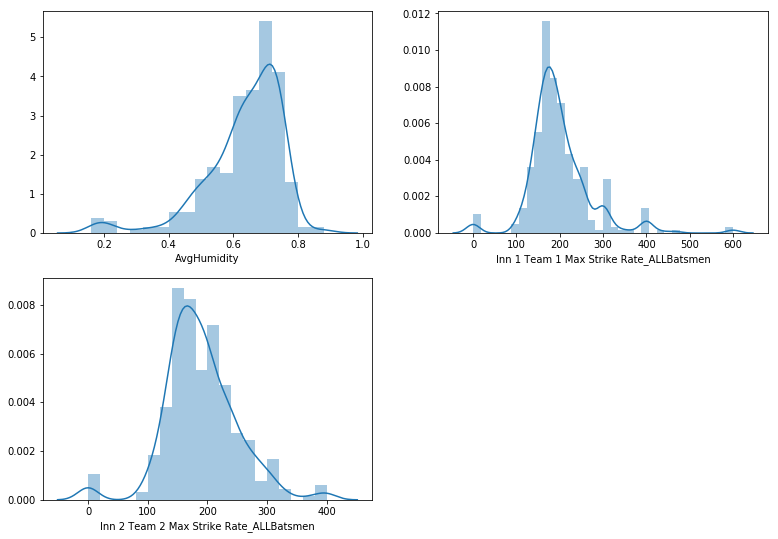

In [269]:
#train_data.hist('AvgHumidity')

plt.figure(figsize=(13,9))
plt.subplot(221)
sns.distplot(train_data['AvgHumidity'])
plt.subplot(222)
sns.distplot(train_data['Inn 1 Team 1 Max Strike Rate_ALLBatsmen'])
plt.subplot(223)
sns.distplot(train_data['Inn 2 Team 2 Max Strike Rate_ALLBatsmen'])
plt.show()

## Observations :

1. AvgHumidity plot is <b>left skew</b> implies outliers is present to the left(below(Q1)<br/>
2. 'Inn 1 Team 1 Max Strike Rate_ALLBatsmen' is <b>right skew</b> implies outliers is present to the right(above Q3)<br/>
3. 'Inn 2 Team 2 Max Strike Rate_ALLBatsmen' is neither too left nor too right so we are moving to boxplot which purely show outliers are present or not

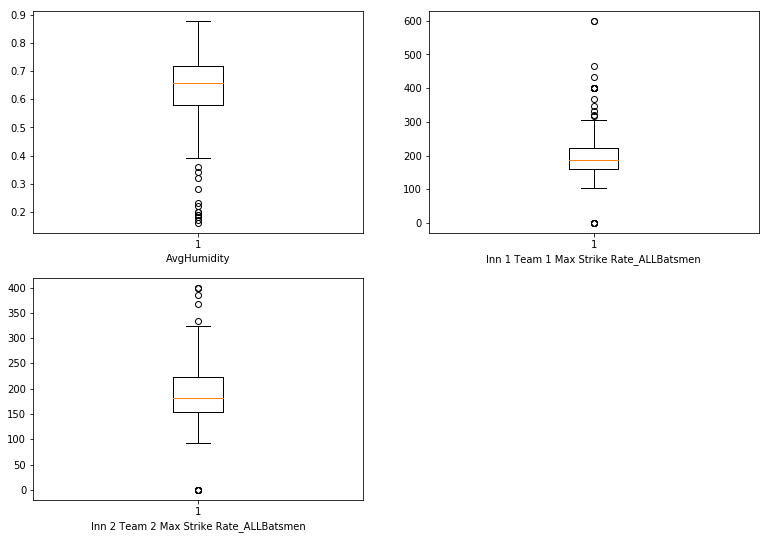

In [270]:
plt.figure(figsize=(13,9))
plt.subplot(221)
plt.boxplot(train_data['AvgHumidity'])
plt.xlabel('AvgHumidity')
plt.subplot(222)
plt.boxplot(train_data['Inn 1 Team 1 Max Strike Rate_ALLBatsmen'])
plt.xlabel('Inn 1 Team 1 Max Strike Rate_ALLBatsmen')
plt.subplot(223)
plt.boxplot(train_data['Inn 2 Team 2 Max Strike Rate_ALLBatsmen'])
plt.xlabel('Inn 2 Team 2 Max Strike Rate_ALLBatsmen')
plt.show()

### 3.2 Categorical Variables

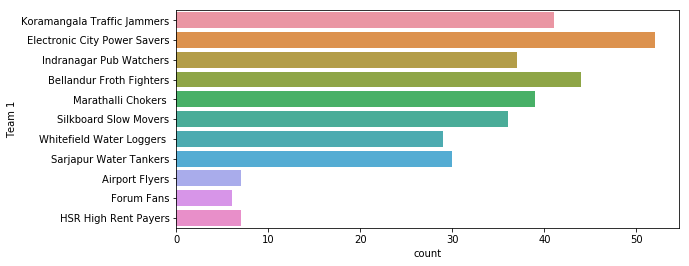

In [271]:
plt.figure(figsize=(9,4))
sns.countplot(y='Team 1', data=train_data)
plt.show()

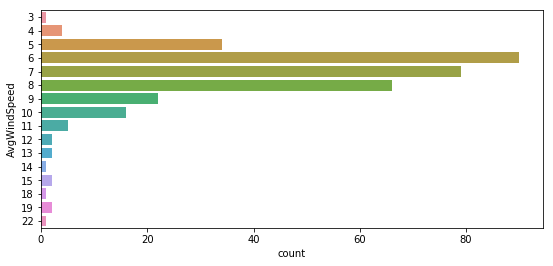

In [272]:
plt.figure(figsize=(9,4))
sns.countplot(y='AvgWindSpeed', data=train_data)
plt.show()

## 4. Bivariate Analysis:

### 4.1 Continuous-Continuous Variables

In [273]:
train_data.corr()

,DayOfWeek,AvgWindSpeed,AvgHumidity,"Inn 1 Team 1 NOP R>25,SR>125","Inn 1 Team 1 NOP R<25, SR>125",Inn 1 Team 1 Total 4s,Inn 1 Team 1 Total 6s,Inn 1 Team 1 Max Strike Rate_ALLBatsmen,Inn 1 Team 2 NoP fast bowlers,Inn 1 Team 2 NoP Spinners,...,"Inn 2 Team 2 NOP R<25, SR>125",Inn 2 Team 2 Total 4s,Inn 2 Team 2 Total 6s,Inn 2 Team 2 Max Strike Rate_ALLBatsmen,Inn 2 Team 1 NoP fast bowlers,Inn 2 Team 1 NoP Spinners,Inn 2 Team 1 wickets taken_catches_runout,Inn2 Team 1 wickets taken_ bowled _lbw_caught by keeper_stumping,Inn 2 Team 1 Extras conceded in_wides_No Balls,"Winner (team 1=1, team 2=0)"
DayOfWeek,1.000000,0.006570,-0.054770,0.000275,-0.003855,-0.062329,-0.039985,-0.097170,-0.017455,0.121605,...,-0.098304,0.040173,0.012040,0.068158,-0.013463,0.126194,-0.035186,-0.063250,0.019833,-0.107076
AvgWindSpeed,0.006570,1.000000,-0.432911,0.001787,-0.082540,0.005887,-0.046758,-0.006207,0.031999,-0.126879,...,-0.071657,-0.124438,-0.005578,-0.041836,0.006913,-0.106839,0.045695,-0.086037,0.088573,0.009108
AvgHumidity,-0.054770,-0.432911,1.000000,-0.081753,-0.093937,-0.218124,-0.066796,-0.151057,-0.109890,0.103570,...,0.007245,-0.066339,-0.158611,-0.031976,-0.125614,0.075294,-0.076673,0.097053,-0.042595,-0.014270
"Inn 1 Team 1 NOP R>25,SR>125",0.000275,0.001787,-0.081753,1.000000,-0.027067,0.557363,0.569978,0.289513,0.196281,0.067094,...,0.262138,0.286533,0.380452,0.295449,0.139664,0.102031,0.384275,0.207546,0.005916,0.365082
"Inn 1 Team 1 NOP R<25, SR>125",-0.003855,-0.082540,-0.093937,-0.027067,1.000000,0.172281,0.160631,0.315771,0.059764,0.127670,...,0.131804,0.122481,0.246626,0.165402,0.107571,0.081547,0.102045,0.064221,-0.013489,0.124055
Inn 1 Team 1 Total 4s,-0.062329,0.005887,-0.218124,0.557363,0.172281,1.000000,0.324726,0.362544,0.369592,0.046404,...,0.331018,0.487876,0.409796,0.345807,0.317329,0.106047,0.392111,0.177932,0.148548,0.326568
Inn 1 Team 1 Total 6s,-0.039985,-0.046758,-0.066796,0.569978,0.160631,0.324726,1.000000,0.451683,0.153610,0.136966,...,0.326233,0.252199,0.481053,0.323435,0.170208,0.029400,0.370564,0.227501,-0.030781,0.387725
Inn 1 Team 1 Max Strike Rate_ALLBatsmen,-0.097170,-0.006207,-0.151057,0.289513,0.315771,0.362544,0.451683,1.000000,0.253472,0.101793,...,0.231103,0.268043,0.331854,0.257099,0.252695,0.011742,0.293498,0.122148,0.016467,0.216820
Inn 1 Team 2 NoP fast bowlers,-0.017455,0.031999,-0.109890,0.196281,0.059764,0.369592,0.153610,0.253472,1.000000,-0.404158,...,0.121343,0.289882,0.169497,0.263009,0.355490,0.052934,0.208378,0.080528,0.242980,0.090775
Inn 1 Team 2 NoP Spinners,0.121605,-0.126879,0.103570,0.067094,0.127670,0.046404,0.136966,0.101793,-0.404158,1.000000,...,0.074461,0.088232,0.146363,0.168113,0.074930,0.271400,0.050216,0.121832,-0.002422,0.062736


# Observations :
we can't able to remove any variables because correlation is low

### 4.2 Categorical-continuous variables:

In [274]:
train_data.groupby('Winner (team 1=1, team 2=0)')['AvgHumidity'].mean()

Winner (team 1=1, team 2=0)
0    0.634863
1    0.631379
Name: AvgHumidity, dtype: float64

In [275]:
train_data.groupby('Winner (team 1=1, team 2=0)')['Inn 1 Team 1 Max Strike Rate_ALLBatsmen'].mean()

Winner (team 1=1, team 2=0)
0    185.347486
1    217.026897
Name: Inn 1 Team 1 Max Strike Rate_ALLBatsmen, dtype: float64

In [276]:
train_data.groupby('Winner (team 1=1, team 2=0)')['Inn 2 Team 2 Max Strike Rate_ALLBatsmen'].mean()

Winner (team 1=1, team 2=0)
0    191.858907
1    186.096690
Name: Inn 2 Team 2 Max Strike Rate_ALLBatsmen, dtype: float64

# Observations:
From last three rows,I can observe that how closely these three continuous independent variables are related with target variable

### 4.3 Categorical-Categorical Variables

In [277]:
crosstab = pd.crosstab(index=train_data['Winner (team 1=1, team 2=0)'], columns=train_data['Team 1'])
crosstab

Team 1,Airport Flyers,Bellandur Froth Fighters,Electronic City Power Savers,Forum Fans,HSR High Rent Payers,Indranagar Pub Watchers,Koramangala Traffic Jammers,Marathalli Chokers,Sarjapur Water Tankers,Silkboard Slow Movers,Whitefield Water Loggers
"Winner (team 1=1, team 2=0)",,,,,,,,,,,
0,5,26,24,6,4,22,24,17,17,22,16
1,2,18,28,0,3,15,17,22,13,14,13


In [278]:
crosstab = pd.crosstab(index=train_data['Winner (team 1=1, team 2=0)'], columns=train_data['Team 2'])
crosstab

Team 2,Airport Flyers,Bellandur Froth Fighters,Electronic City Power Savers,Forum Fans,HSR High Rent Payers,Indranagar Pub Watchers,Koramangala Traffic Jammers,Marathalli Chokers,Sarjapur Water Tankers,Silkboard Slow Movers,Whitefield Water Loggers
"Winner (team 1=1, team 2=0)",,,,,,,,,,,
0,4,11,21,5,1,22,21,22,27,21,28
1,3,21,9,3,8,15,13,16,19,16,22


## 5. Missing Value Treatment :

There is <b>no missing values</b> in train or test datasets so this step is <b>not required</b>

## 6. Outlier Treatment:

i am using formula to remove outliers from top and bottom of box plot<br/>
<b>from top : Q3+1.5*(Q3-Q1)</b><br/>
<b>from bottom : Q1-1.5*(Q3-Q1)</b>

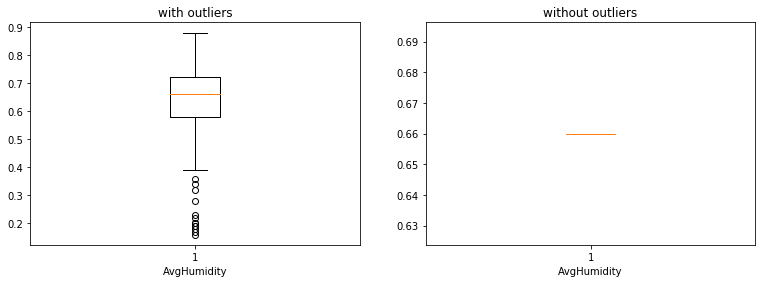

In [279]:

plt.figure(figsize=(13,9))
plt.subplot(221)
plt.title('with outliers')
plt.boxplot(train_data['AvgHumidity'])
plt.xlabel('AvgHumidity')
train_data.loc[(train_data['AvgHumidity']<3.0),'AvgHumidity']=train_data['AvgHumidity'].median()
plt.subplot(222)
plt.title('without outliers')
plt.boxplot(train_data['AvgHumidity'])
plt.xlabel('AvgHumidity')
plt.show()

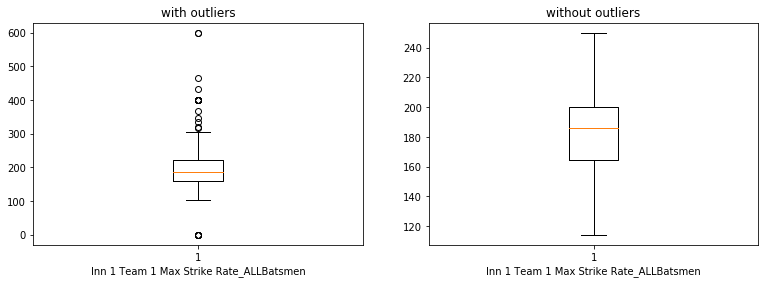

In [280]:
plt.figure(figsize=(13,9))
plt.subplot(221)
plt.title('with outliers')
plt.boxplot(train_data['Inn 1 Team 1 Max Strike Rate_ALLBatsmen'])
plt.xlabel('Inn 1 Team 1 Max Strike Rate_ALLBatsmen')
train_data.loc[(train_data['Inn 1 Team 1 Max Strike Rate_ALLBatsmen']>250.0) | (train_data['Inn 1 Team 1 Max Strike Rate_ALLBatsmen']<112.775) ,'Inn 1 Team 1 Max Strike Rate_ALLBatsmen']=train_data['Inn 1 Team 1 Max Strike Rate_ALLBatsmen'].median()
plt.subplot(222)
plt.title('without outliers')
plt.boxplot(train_data['Inn 1 Team 1 Max Strike Rate_ALLBatsmen'])
plt.xlabel('Inn 1 Team 1 Max Strike Rate_ALLBatsmen')
plt.show()

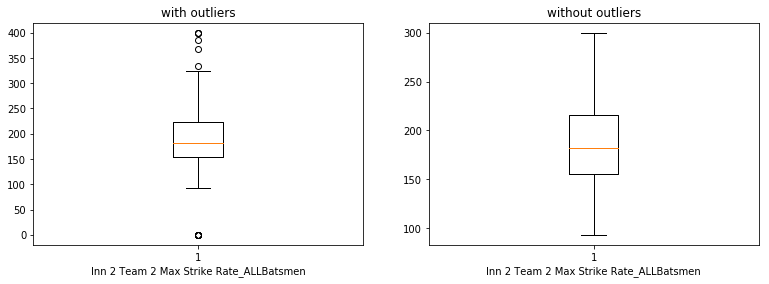

In [281]:
plt.figure(figsize=(13,9))
plt.subplot(221)
plt.title('with outliers')
plt.boxplot(train_data['Inn 2 Team 2 Max Strike Rate_ALLBatsmen'])
plt.xlabel('Inn 2 Team 2 Max Strike Rate_ALLBatsmen')
train_data.loc[(train_data['Inn 2 Team 2 Max Strike Rate_ALLBatsmen']>315.0) | (train_data['Inn 2 Team 2 Max Strike Rate_ALLBatsmen']<10.0) ,'Inn 2 Team 2 Max Strike Rate_ALLBatsmen']=train_data['Inn 2 Team 2 Max Strike Rate_ALLBatsmen'].median()
plt.subplot(222)
plt.title('without outliers')
plt.boxplot(train_data['Inn 2 Team 2 Max Strike Rate_ALLBatsmen'])
plt.xlabel('Inn 2 Team 2 Max Strike Rate_ALLBatsmen')
plt.show()

## 7. Transformation:

In [282]:
# converting 'object' type into 'int' type

from sklearn.preprocessing import LabelEncoder

col=['Team 1', 'Team 2','City','TimeOfGame']

le=LabelEncoder()

for i in col:
    train_data[i]=le.fit_transform(train_data[i]).astype(np.int)

In [283]:
train_data.head(3)

,Team 1,Team 2,City,DayOfWeek,TimeOfGame,AvgWindSpeed,AvgHumidity,"Inn 1 Team 1 NOP R>25,SR>125","Inn 1 Team 1 NOP R<25, SR>125",Inn 1 Team 1 Total 4s,...,"Inn 2 Team 2 NOP R<25, SR>125",Inn 2 Team 2 Total 4s,Inn 2 Team 2 Total 6s,Inn 2 Team 2 Max Strike Rate_ALLBatsmen,Inn 2 Team 1 NoP fast bowlers,Inn 2 Team 1 NoP Spinners,Inn 2 Team 1 wickets taken_catches_runout,Inn2 Team 1 wickets taken_ bowled _lbw_caught by keeper_stumping,Inn 2 Team 1 Extras conceded in_wides_No Balls,"Winner (team 1=1, team 2=0)"
0,6,10,8,1,8,6,0.66,1,1,15,...,0,3,3,120.00,5,0,6,4,11,1
1,2,9,7,2,5,7,0.66,3,2,20,...,2,18,9,215.15,4,1,4,0,5,1
2,5,8,6,3,10,11,0.66,2,2,13,...,1,18,1,300.00,3,3,0,1,10,0


# 8. Modeling :

In [284]:
# now separating train and test dataset

training=train_data[:252]
testing=train_data[252:]

In [285]:
# separating independent and dependent variables

x1 = training.iloc[:, :-1].values
y1 = training["Winner (team 1=1, team 2=0)"].values

In [286]:
x2 = testing.iloc[:, :-1].values
y2 = testing["Winner (team 1=1, team 2=0)"].values

In [287]:
np.mean(y1), np.mean(1-y1)

(0.44047619047619047, 0.5595238095238095)

In [288]:
np.mean(y2), np.mean(1-y2)

(0.4473684210526316, 0.5526315789473685)

## Applying Bagging and Boosting techniques as well as traditional technique (Logistic Regression)

In [289]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,roc_auc_score

In [290]:
# training the RF Model

rf_model = RandomForestClassifier(n_estimators=200)
rf_model.fit(x1, y1)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [291]:
# make predictions on the test set - both "hard" predictions, and the scores 

y_pred_class_rf = rf_model.predict(x2)
y_pred_prob_rf = rf_model.predict_proba(x2)


print('accuracy is {:.3f}'.format(accuracy_score(y2,y_pred_class_rf)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y2,y_pred_prob_rf[:,1])))

accuracy is 0.855
roc-auc is 0.940


In [292]:
y2,y_pred_class_rf

(array([0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
        0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
        1, 0, 0, 1, 1, 0, 1, 1, 1, 0]),
 array([0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
        0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
        0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
        1, 0, 0, 1, 1, 0, 1, 1, 1, 1]))

In [293]:
y_pred_prob_rf[:,1]

array([0.085, 0.11 , 0.435, 0.795, 0.67 , 0.835, 0.85 , 0.71 , 0.255,
       0.865, 0.04 , 0.845, 0.565, 0.045, 0.22 , 0.085, 0.555, 0.865,
       0.135, 0.52 , 0.295, 0.025, 0.375, 0.765, 0.285, 0.09 , 0.835,
       0.14 , 0.33 , 0.815, 0.08 , 0.035, 0.555, 0.015, 0.765, 0.895,
       0.745, 0.66 , 0.125, 0.32 , 0.27 , 0.43 , 0.045, 0.425, 0.405,
       0.585, 0.72 , 0.905, 0.675, 0.35 , 0.155, 0.06 , 0.87 , 0.08 ,
       0.31 , 0.505, 0.625, 0.285, 0.06 , 0.875, 0.485, 0.45 , 0.39 ,
       0.305, 0.61 , 0.31 , 0.67 , 0.36 , 0.09 , 0.795, 0.71 , 0.09 ,
       0.94 , 0.91 , 0.915, 0.695])

In [294]:
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier

from sklearn.linear_model import LogisticRegression

Classifiers=['LogisticRegression','GBC','ABC']

models=[LogisticRegression(),GradientBoostingClassifier(n_estimators=250,max_depth=3,learning_rate=0.01),
        AdaBoostClassifier(n_estimators=250,learning_rate=0.01)]

accuracy=[]
roc=[]

for i in models:
    mod=i
    fit=mod.fit(x1,y1)
    predict=fit.predict(x2)
    predict_proba=fit.predict_proba(x2)
    accuracy.append(accuracy_score(y2,predict))
    roc.append(roc_auc_score(y2,predict_proba[:,1]))
    
pd.DataFrame(accuracy,index=Classifiers,columns=['accuracy'])

,accuracy
LogisticRegression,0.934211
GBC,0.907895
ABC,0.776316


In [295]:
pd.DataFrame(roc,index=Classifiers,columns=['roc'])

,roc
LogisticRegression,0.979692
GBC,0.934174
ABC,0.911415


In [296]:
lg=LogisticRegression()
lg.fit(x1,y1)
y_pred_class = lg.predict(x2)
y_pred_prob=lg.predict_proba(x2)


print('accuracy is {:.3f}'.format(accuracy_score(y2,y_pred_class)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y2,y_pred_prob[:,1])))

accuracy is 0.934
roc-auc is 0.980


In [297]:
y2,y_pred_class

(array([0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
        0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
        1, 0, 0, 1, 1, 0, 1, 1, 1, 0]),
 array([0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
        0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
        1, 0, 0, 1, 1, 0, 1, 1, 1, 0]))

In [298]:
y_pred_prob[:,1]

array([3.40483743e-07, 3.03274601e-03, 9.93964035e-01, 9.99988149e-01,
       9.98937407e-01, 9.99998073e-01, 9.99881475e-01, 9.86895835e-01,
       4.53882552e-02, 9.99992056e-01, 2.87620188e-04, 9.99959355e-01,
       7.79730740e-01, 2.16710345e-03, 5.73821706e-02, 6.70463952e-04,
       9.85809832e-01, 9.99999972e-01, 4.65158232e-02, 1.48981503e-01,
       2.72798487e-04, 5.96832421e-05, 5.87572367e-04, 9.93350127e-01,
       9.11166428e-03, 3.31698706e-01, 9.86698093e-01, 4.66122665e-02,
       7.77048117e-04, 9.99922692e-01, 6.95461422e-04, 3.77596738e-03,
       7.11761288e-01, 2.74741028e-03, 4.62106335e-01, 9.99985758e-01,
       9.79152103e-01, 9.98808014e-01, 6.10339992e-01, 4.02401264e-03,
       9.73911149e-04, 5.05842486e-01, 5.67609146e-03, 1.84856105e-01,
       4.50354181e-02, 8.22950339e-02, 9.46822317e-01, 9.99727577e-01,
       4.31286933e-01, 4.38681050e-02, 1.39928968e-01, 9.20476706e-05,
       9.99863662e-01, 6.65918387e-06, 4.24013742e-04, 1.06447751e-03,
      

## Applying Neural Network technique:

In [299]:
# importing Keras objects for Deep Learning

from keras.models  import Sequential
from keras.layers import Input, Dense,Dropout
from keras.optimizers import RMSprop

In [300]:
# i will build a model with two hidden layers of size 512
# Fully connected inputs at each layer
# i will use dropout of .2 to help regularize

model_1 = Sequential()
model_1.add(Dense(64, activation='relu', input_shape=(27,)))
model_1.add(Dropout(0.2))
model_1.add(Dense(64, activation='relu'))
model_1.add(Dropout(0.2))
model_1.add(Dense(1, activation="sigmoid"))

In [301]:
model_1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 64)                1792      
_________________________________________________________________
dropout_11 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_12 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 65        
Total params: 6,017
Trainable params: 6,017
Non-trainable params: 0
_________________________________________________________________


In [302]:
# now compiling the model

learning_rate = .001
model_1.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=learning_rate),
              metrics=['accuracy'])

In [303]:
# And now fitting 

batch_size = 128  # mini-batch with 128 examples
epochs = 150
history = model_1.fit(
    x1, y1,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x2, y2))

Train on 252 samples, validate on 76 samples
Epoch 1/150
252/252 [==============================] - 1s 2ms/step - loss: 6.9613 - acc: 0.5595 - val_loss: 7.2107 - val_acc: 0.5526
Epoch 2/150
252/252 [==============================] - 0s 75us/step - loss: 7.0973 - acc: 0.5595 - val_loss: 7.2107 - val_acc: 0.5526
Epoch 3/150
252/252 [==============================] - 0s 72us/step - loss: 7.0165 - acc: 0.5595 - val_loss: 7.2107 - val_acc: 0.5526
Epoch 4/150
252/252 [==============================] - 0s 88us/step - loss: 6.8399 - acc: 0.5516 - val_loss: 7.2107 - val_acc: 0.5526
Epoch 5/150
252/252 [==============================] - 0s 41us/step - loss: 6.9069 - acc: 0.5317 - val_loss: 7.2107 - val_acc: 0.5526
Epoch 6/150
252/252 [==============================] - 0s 81us/step - loss: 6.6908 - acc: 0.5278 - val_loss: 7.2107 - val_acc: 0.5526
Epoch 7/150
252/252 [==============================] - 0s 77us/step - loss: 6.0762 - acc: 0.5397 - val_loss: 3.0008 - val_acc: 0.5658
Epoch 8/150
252/25

In [304]:
score = model_1.evaluate(x2, y2, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.3773496378409235
Test accuracy: 0.868421052631579


In [305]:
test_original['my_prediction']=y_pred_class_rf
test_original['likelihood_winning']=y_pred_prob_rf[:,1]

In [306]:
test_original

,Game ID,Team 1,Team 2,CityOfGame,Day,DateOfGame,TimeOfGame,AvgWindSpeed,AvgHumidity,"Inn 1 Team 1 NOP R>25,SR>125",...,Inn 2 Team 2 Total 6s,Inn 2 Team 2 Max Strike Rate_ALLBatsmen,Inn 2 Team 1 NoP fast bowlers,Inn 2 Team 1 NoP Spinners,Inn 2 Team 1 wickets taken_catches_runout,Inn2 Team 1 wickets taken_ bowled _lbw_caught by keeper_stumping,Inn 2 Team 1 Extras conceded in_wides_No Balls,"Winner (team 1=1, team 2=0)",my_prediction,likelihood_winning
0,253,Electronic City Power Savers,Marathalli Chokers,Electronic City,6,01-01-2016,20:00:00,5,0.62,1,...,5,142.85,3,3,1,1,3,0,0,0.085
1,254,Koramangala Traffic Jammers,Sarjapur Water Tankers,Koramangala,7,01-02-2016,20:00:00,6,0.66,1,...,4,210.00,3,2,1,1,1,0,0,0.110
2,255,HSR High Rent Payers,Marathalli Chokers,Marathalli,1,01-03-2016,16:00:00,5,0.64,0,...,1,166.66,4,2,2,7,4,1,0,0.435
3,256,Indranagar Pub Watchers,Silkboard Slow Movers,Indranagar,2,01-04-2016,20:00:00,5,0.64,1,...,4,166.66,2,4,6,3,2,1,1,0.795
4,257,Whitefield Water Loggers,Sarjapur Water Tankers,Whitefield,3,01-05-2016,16:00:00,5,0.62,2,...,2,160.00,4,2,6,1,2,1,1,0.670
5,258,Electronic City Power Savers,Bellandur Froth Fighters,Bellandur,4,01-06-2016,20:00:00,5,0.62,3,...,4,187.50,3,4,5,5,3,1,1,0.835
6,259,Indranagar Pub Watchers,Koramangala Traffic Jammers,Indranagar,5,01-07-2016,16:00:00,5,0.60,2,...,5,227.27,2,3,4,6,5,1,1,0.850
7,260,HSR High Rent Payers,Silkboard Slow Movers,HSR,6,01-08-2016,20:00:00,5,0.60,0,...,4,200.00,4,2,6,2,5,1,1,0.710
8,261,Bellandur Froth Fighters,Marathalli Chokers,HSR,7,01-09-2016,20:00:00,5,0.63,2,...,8,175.00,2,3,3,2,0,0,0,0.255
9,262,Koramangala Traffic Jammers,Whitefield Water Loggers,Whitefield,1,01-10-2016,16:00:00,5,0.64,2,...,3,166.66,4,1,6,3,8,1,1,0.865


# Conclusion from above five models:
1. Best model are Random forest classifier and Logistic regression